# Posición en sistemas con partes rotantes

[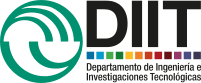](https://ingenieria.unlam.edu.ar/)   
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2024
[Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)   

---

## Enunciado | Resorte enrollado en una T
Una pieza rígida en forma de T consiste en una larga varilla soldada perpendicularmente a otra de longitud $\ell$ que pivotea en torno a un origen.
La T gira sobre un plano horizontal con velocidad angular constante $\omega$.
Una partícula de masa $m$ muy superior a la de la T, por la que esta última es despreciable, puede desplazarse libremente en la primer varilla y está conectada a la intersección de ambas por un resorte de constante elástica $k$ y longitud natural nula.
1. Encuentre una ecuación para la dinámica de la distancia de la partícula a la intersección $d$.
1. Obtenga $d(t)$ asumiendo las condición iniciales que desee. 
1. Existe un ``valor especial'' para $\omega$. ¿Cuál sería y por qué es especial? 

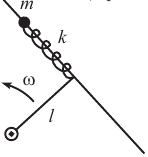

## Parámetros físicos del modelo del sistema

In [1]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
m, k, omega, l = sm.symbols('m, k, \omega, \ell', positive=True) # parámetros del sistema. El \ell es para usar la letra bonita de ele.

# Definimos las coordenadas generalizadas
e = me.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
t = sm.symbols('t') # tiempo

## Opción 1: trabajar todo en el marco de referencia fijo

Hay dos cosas que deben definirse
- la longitud del resorte, que corresponde con $d$
- la posición de la partícula de masa $m$

El sistema de referencia $e$ puede tener como origen el punto en torno al que gira la T, versor $\hat{x}$ apuntado hacia la derecha y el $\hat{y}$ hacia arriba.
El vector posición de la partícula es la suma del vector hasta el punto de unión de ambas barrar de la T y el del resorte con origen en esa unión.
La posición del vértice es 

In [3]:
vértice_r = l* (sm.cos(omega * t) * e.x + sm.sin(omega * t) * e.y) # posición del vértice r

Y no es difícil interpretar la geometría para determinar las proyecciones en los ejes elegidos del vector para el resorte.

In [4]:
d = me.dynamicsymbols('d') # única coordenada generalizada | distancia partícula al vértice T
partícula_r = vértice_r + d* (-sm.sin(omega * t) * e.x + sm.cos(omega * t) * e.y) # posición de la partícula
partícula_r

## Opción 2: Marco de referencia rotante
Imagino un sistema cartesiano con $\hat{e}_x$ apunta a derecha y $\hat{e}_y$ hacia arriba.

Si en $t=0$ la parte de la T de longitud $l$ coincide con la horizontal, y está a la derecha del punto de pivoteo la posición de partícula será

In [5]:
partícula_r = l* e.x + d* e.y
partícula_r

Tal vector tridimensional puede escribirse manualmente en notación matricial como un vector 1x3.

In [6]:
partícula_r_matriz = sm.Matrix([[l], [d], [0]])
partícula_r_matriz

⎡\ell⎤
⎢    ⎥
⎢ d  ⎥
⎢    ⎥
⎣ 0  ⎦

El efecto de la velocidad angular constante $\omega \hat{z}$ puede representarse por matriz de rotación para el ángulo $\omega t$ en torno a $\hat{z}$.

In [7]:
matrizRotación = sm.Matrix([[sm.cos(omega* t), -sm.sin(omega* t), 0], [ sm.sin(omega* t), sm.cos(omega* t), 0], [0,0,1] ] )
matrizRotación

⎡cos(\omega⋅t)  -sin(\omega⋅t)  0⎤
⎢                                ⎥
⎢sin(\omega⋅t)  cos(\omega⋅t)   0⎥
⎢                                ⎥
⎣      0              0         1⎦

La mera multiplicación permite obtener las componentes en $\hat{x}$ y $\hat{y}$ de la posición de la partícula para todo $t$.

In [8]:
matrizRotación* partícula_r_matriz

⎡\ell⋅cos(\omega⋅t) - d⋅sin(\omega⋅t)⎤
⎢                                    ⎥
⎢\ell⋅sin(\omega⋅t) + d⋅cos(\omega⋅t)⎥
⎢                                    ⎥
⎣                 0                  ⎦

### Automatizando el proceso

No hay necesidad de tras tomarse el trabajo de manualmente escribir el vector de posición para $t=0$ hacer otro tanto para expresar lo mismo en formato matricial.
Hay una función de `SymPy.physics.mechanics` que convierte el vector a este formato.

In [9]:
partícula_r.to_matrix(e)

⎡\ell⎤
⎢    ⎥
⎢ d  ⎥
⎢    ⎥
⎣ 0  ⎦

De igual forma hay una función de SymPy para evitarnos el trabajo de escribir manualmente la matriz de rotación.

**¡Ojo!** SymPy toma de referencia el sistema destino, así que debemos indicar una rotación en sentido contrario al de la rotación de la pieza.

In [10]:
sm.rot_axis3(- omega* t) # existen las variantes de "axis" para los ejes 1 y 2

⎡cos(\omega⋅t)  -sin(\omega⋅t)  0⎤
⎢                                ⎥
⎢sin(\omega⋅t)  cos(\omega⋅t)   0⎥
⎢                                ⎥
⎣      0              0         1⎦

Por lo que el procedimiento de rotar el vector original podía realizarse en una línea usando estas funciones.

In [11]:
rotada = sm.rot_axis3(- omega* t)* partícula_r.to_matrix(e)
rotada

⎡\ell⋅cos(\omega⋅t) - d⋅sin(\omega⋅t)⎤
⎢                                    ⎥
⎢\ell⋅sin(\omega⋅t) + d⋅cos(\omega⋅t)⎥
⎢                                    ⎥
⎣                 0                  ⎦

Y si bien existe una función que lleva de notación vectorial a matricial, el camino inverso se realiza en forma manual multiplicando cada componente por el correspondiente versor en el sistema de referencia elegido.

In [12]:
rotada_vector = rotada[0]* e.x+ rotada[1]* e.y+ rotada[2]* e.z
rotada_vector

Arribándose al mismo resultado que con la otra opción.